<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

As a guidance counselor in a high school, a major stress point for students is whether they will be able to enter college. Students would ask if they should take SAT or ACT to enter into a college. 

In this project, I would like to explore if taking SAT or ACT allow for students to enter colleges easier.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

I will be using the following dataset:

* act_2017.csv: 2017 ACT Scores by State
* act_2018.csv: 2018 ACT Scores by State
* sat_2017.csv: 2017 SAT Scores by State
* sat_2018.csv: 2018 SAT Scores by State
* sat_act_by_college.csv: Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

sources: 

https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act

https://www.edweek.org/teaching-learning/math-scores-slide-to-a-20-year-low-on-act/2018/10

https://reports.collegeboard.org/archive/sat-suite-program-results/2018/class-2018-results

https://www.nacacnet.org/news--publications/publications/state-of-college-admission/

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def get_mean(lst):
    sum_list = 0
    for _ in range(len(lst)):
        sum_list += lst[_]
    return sum_list / len(lst)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:

def get_std(lst):
    mean_of_lst = get_mean(lst)
    sum_lst = 0
    
    for _ in range(len(lst)):
        sum_lst += ((lst[_] - mean_of_lst) ** 2)
        
    return ((sum_lst / (len(lst))) ** 0.5)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:

def str_to_percent(string):
    num = string.replace('%','')
    return float(num) / 100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# importing csv
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_act_by_college = pd.read_csv('../data/sat_act_by_college.csv')
act_overall_participation = pd.read_csv('../data/US ACT participation and scores.csv') # source = https://www.edweek.org/teaching-learning/math-scores-slide-to-a-20-year-low-on-act/2018/10

In [6]:
# Viewing first 5 rows of data
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [7]:
# checking the summary stats of data
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
# view data type
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
# Viewing first 5 rows of data
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [10]:
# checking the summary stats of data
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [11]:
# view data type
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
# Viewing first 5 rows of data
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [13]:
# checking the summary stats of data
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [14]:
# view data type
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [15]:
# Viewing first 5 rows of data
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [16]:
# checking the summary stats of data
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [17]:
# view data type
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


## Issues with the data sets:

### Common issue:
1) The values in column 'Participation' for all 4 data sets are `object` instead of `int` or `float`.

### SAT 2017 and SAT 2018:

1) While the data for sat_2017 seems complete, there is an error in the min value for math as it is too low at 52. After checking with the datasource, the math score of Maryland should be 524 instead of 52. 

2) There are no visible issues with the sat_2018 dataset

### ACT 2017 and ACT 2018:

1) There is a difference in the number of columns for act_2017 and act_2018. There seem to no have any data for the component scores for act_2018. 

2) The 'composite' column for act_2017 is in `object` instead of a `float`. After checking with the datasource, there is an addition 'x' on the Wyoming composite score.

3) There is also an error with the min value of science for act_2017.

4) There is a difference in name of 'District of Columbia in act_2017 compared to 'District of columbia' in act_2018 

5) There should only be 51 entries as there are only 50 states plus District of Columbia. However, there are 52 entries for both act_2017 and act_2018. Upon checking, act_2017 has an extra 'National' data entry while act_2018 has a duplicate 'Maine' entry.

In [18]:
# Viewing first 5 rows of data
sat_act_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [19]:
# checking the summary stats of data
sat_act_by_college.describe()

,Number of Applicants
count,416.000000
mean,17481.759615
std,17447.621897
min,211.000000
25%,5313.000000
50%,11622.000000
75%,23599.750000
max,111322.000000


In [20]:
# view data type
sat_act_by_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


## Issues with the sat_act_by_college data set:

1) There are some redundant columns which are not useful to this project's analysis.

2) This project seeks to find the score which is accepted into the various colleges. Hence, there is a need to separate the 25th - 75th percentile of the scores and change the data type to a `float`.

In [21]:
# Viewing first 5 rows of data
act_overall_participation.head()

,US GDP and unemployment,Number of Students Tested,Composite Average ACT Scores
0,2012,"1,666,017",21.1
1,2013,"1,799,243",20.9
2,2014,"1,845,787",21.0
3,2015,"1,924,436",21.0
4,2016,"2,090,342",20.8


In [22]:
# checking the summary stats of data
act_overall_participation.describe()

,US GDP and unemployment,Composite Average ACT Scores
count,7.000000,7.000000
mean,2015.000000,20.942857
std,2.160247,0.113389
min,2012.000000,20.800000
25%,2013.500000,20.850000
50%,2015.000000,21.000000
75%,2016.500000,21.000000
max,2018.000000,21.100000


In [23]:
# view data type
act_overall_participation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   US GDP and unemployment       7 non-null      int64  
 1   Number of Students Tested     7 non-null      object 
 2   Composite Average ACT Scores  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


## Issues with the act_overall_participation data set:

1) The column 'US GDP and unemployment' seems to be an error, the column name should be 'year'

2) The years in interest to compare with the other data sets are only 2017, 2018.

3) The column 'Number of Students Tested' should have values of `int` or `float` instead of `object`.

In [24]:
# to create new dataframe of SAT takers based on data from (https://reports.collegeboard.org/archive/sat-suite-program-results/2018/class-2018-results https://www.nacacnet.org/news--publications/publications/state-of-college-admission/)
sat_test_takers = {'year': [2017, 2018], 'test takers': [1715481, 2136539], 'type': ['SAT', 'SAT']}
sat_overall_participation = pd.DataFrame(sat_test_takers)

In [25]:
# to add ACT in type
act_overall_participation['type'] = 'ACT'

# Cleaning data sets

Lowercase-ing the columns of all data sets:

In [26]:
# to ensure no KeyError due to capital letters, all column names will be made to lowercase.
data_sets = [sat_act_by_college, sat_2018, sat_2017, sat_overall_participation, act_2017, act_2018, act_overall_participation]

for data_set in range(len(data_sets)):
    data_sets[data_set].columns = data_sets[data_set].columns.str.lower()

Replacing all wrong values in the data sets:

In [27]:
# to replace wrong value of math for Maryland in sat_2017
sat_2017.loc[20:20, 'math'] = int(524)

# to replace the value of 20.2x from Wyoming in act_2017
act_2017.loc[51:51,'composite'] = float(20.2)

# to convert the value to float instead of object
act_2017['composite'] = act_2017['composite'].astype(float)

# to rename 'District of Columbia' to match act_2017
act_2018.loc[8:8,'state'] = 'District of Columbia'

Dropping any unwanted rows and columns:

In [28]:
# Remove the 'National' data entry
act_2017.drop(0, axis=0, inplace=True)

# Remove the duplicated 'Maine' data entry
act_2018.drop(19, axis=0, inplace=True)

# Removing the additional columns to match act_2018
act_extra_columns = ['english', 'math', 'reading', 'science']
act_2017.drop(act_extra_columns, axis=1, inplace=True)

# Removing unwanted columns 
sat_act_by_college.drop('applies to class year(s)', axis=1, inplace=True)
sat_act_by_college.drop('policy details', axis=1, inplace=True)
sat_act_by_college.drop('test optional?', axis=1, inplace=True)

Separating ACT and SAT 25th - 75th percentile to separate columns

In [29]:
# rename 25th-75th percentile to 25th percentile
sat_act_by_college.rename(columns = {
    'sat total 25th-75th percentile': 'sat 25th percentile',
    'act total 25th-75th percentile': 'act 25th percentile'
}, inplace=True)

# create a list to make 2 extra columns
sat_act_college1 = ['act 25th percentile', 'act 75th percentile']
sat_act_college2 = ['sat 25th percentile', 'sat 75th percentile']

# Split the columns by str '-' into the 4 different columns
sat_act_by_college[sat_act_college1] = sat_act_by_college['act 25th percentile'].str.split('-', 1,expand=True)
sat_act_by_college[sat_act_college2] = sat_act_by_college['sat 25th percentile'].str.split('-', 1,expand=True)

In [30]:
# character '\u200b' was detected which caused the data to be a object instead and was unable to remove.
# Hence, replacing the str '\u200b' with '' instead.
sat_act_by_college['act 25th percentile'] = sat_act_by_college['act 25th percentile'].str.replace('\u200b', '')
sat_act_by_college['sat 25th percentile'] = sat_act_by_college['sat 25th percentile'].str.replace('\u200b', '')

In [31]:
# to convert the columns to float, replace '' with np.nan
sat_act_by_college['act 25th percentile'] = sat_act_by_college['act 25th percentile'].replace('', np.nan)
sat_act_by_college['sat 25th percentile'] = sat_act_by_college['sat 25th percentile'].replace('', np.nan)


# to replace any missing values with np.nan
sat_act_by_college['act 75th percentile'] = sat_act_by_college['act 75th percentile'].replace('-', np.nan)
sat_act_by_college['sat 75th percentile'] = sat_act_by_college['sat 75th percentile'].replace('-', np.nan)

# to covert the 25th percentile columns to float.
sat_act_by_college[sat_act_college1] = sat_act_by_college[sat_act_college1].astype(float)
sat_act_by_college[sat_act_college2] = sat_act_by_college[sat_act_college2].astype(float)

In [32]:
# Reordering the columns such that SAT and ACT 25th and 75th percentile are side by side respectively
sat_act_by_college = sat_act_by_college.loc[:, [
    'school',
    'number of applicants',
    'accept rate',
    'sat 25th percentile',
    'sat 75th percentile', 
    'act 25th percentile', 
    'act 75th percentile'
]]

Renaming columns

In [33]:
sat_rename_participation = [sat_2017, sat_2018]

for lst in range(len(sat_rename_participation)):
    sat_rename_participation[lst].rename(columns =  {
    'participation rate': 'participation',
    'evidence-based reading and writing': 'ebrw'
}, inplace=True)

In [34]:
# rename the wrong columns
act_overall_participation.rename(columns = {
    'us gdp and unemployment': 'year',
    'number of students tested': 'test takers'
}, inplace=True)

In [35]:
# replace all ',' and convert values to float
act_overall_participation['test takers'] = act_overall_participation['test takers'].str.replace(',', '').astype(int)

Using the str_to_percent function to convert all participation objects to float.

In [36]:
sat_act_participation_str_to_percent = [sat_2017, sat_2018, act_2017, act_2018]

for index in range(len(sat_act_participation_str_to_percent)):
    sat_act_participation_str_to_percent[index]['participation'] = sat_act_participation_str_to_percent[index]['participation'].map(str_to_percent)

In [37]:
# reset the index for all data sets due to droping of the rows
for data_set in data_sets:
    data_set.reset_index(drop=True, inplace=True)

In [38]:
# to merge act_2017 and act_2018
act_1718 = pd.merge(
    left=act_2017,
    right=act_2018,
    on='state',
    suffixes=['_2017','_2018']
)

In [39]:
# to merge sat_2017 and sat_2018
sat_1718 = pd.merge(
    left=sat_2017,
    right=sat_2018,
    on='state',
    suffixes=['_2017', '_2018']
)


In [40]:
# to merge sat_1718 and act_1718
sat_act_1718 = pd.merge(
    left=sat_1718,
    right=act_1718,
    on='state',
    suffixes=['_sat', '_act']
)

In [41]:
# to concat sat_overall_participation and act_overall_participation
total_overall_participation = pd.concat(objs = [sat_overall_participation, act_overall_participation])

In [42]:
# reset index after concatenation
total_overall_participation.reset_index(drop=True, inplace=True)

In [43]:
# create a mask for rows with value year 2017 and 2018.
indexrow = total_overall_participation[(total_overall_participation['year'] != 2017) & (total_overall_participation['year'] != 2018)].index

In [44]:
# drop rows for the unwanted rows.
total_overall_participation.drop(indexrow, inplace=True)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2017, sat_2018, sat_2019, act_2017, act_2018| The name of the state of interest|
|**participation**|*float*|sat_2017, sat_2018, sat_2019, act_2017, act_2018| The percent of graduating high school students who took the exam (act/sat respectively)( units percent to two decimal places, 0.38 means 38% )
|**ebrw**|*interger*|sat_2017, sat_2018, sat_2019, sat_2019_by_major| The average score of Evidence-Based Reading and Writing (ebrw) in sat for the state|
|**math**|*interger*|sat_2017, sat_2018, sat_2019, sat_2019_by_major| The average score of Math in sat for the state|
|**total**|*integer*|sat_2017, sat_2018, sat_2019, sat_2019_by_major| The average combined score of ebrw and math in sat for the state|
|**composite**|*integer*|act_2017, act_2018| The average combined score in act for the state|
|**school**|*object*|sat_act_by_college| The name of the school of interest|
|**number of applicants**|*integer*|sat_act_by_college| The total number of applicants to the school for both act and sat|
|**accept rate**|*float*|sat_act_by_college| The percent of accepted students out of the number of applicants ( units percent to two decimal places, 0.38 means 38% )
|**sat 25th percentile**|*float*|sat_act_by_college| The combined sat score for the 25th percentile of students who were accepted based on sat.|
|**sat 75th percentile**|*float*|sat_act_by_college| The combined sat score for the 75th percentile of students who were accepted based on sat.|
|**act 25th percentile**|*float*|sat_act_by_college| The combined act score for the 25th percentile of students who were accepted based on act.|
|**act 75th percentile**|*float*|sat_act_by_college| The combined act score for the 75th percentile of students who were accepted based on act.|
|**type**|*object*|total_overall_participation| The type of test taken (SAT or ACTs)|
|**test takers**|*integer*|total_overall_participation| The number of high school students who had taken SATs or ACTs|



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Summary Statistics:

In [45]:
sat_act_1718.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_2017_sat,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
ebrw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_2018_sat,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
ebrw_2018,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
math_2018,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_2018,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
participation_2017_act,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


**SAT 2017**
1) Participation had a mean of 39.8% with std of 35.3%. The min participation rate was 2% while the max participation rate was 100%.
   
2) Total SAT score had a mean of 1126.1 with std of 92.5. The min score is 950 and max score is 1295.

**SAT 2018**
1) Participation had a mean of 45.8% with std of 37.3%. The min participation rate was 2% while the max participation rate was 100%.

2) Total SAT score had a mean of 1120 with std of 94.2. The min score is 977 and max score is 1298.

**ACT 2017**
1) Participation had a mean of 65.3% with std of 32.1%. The min participation rate was 8% while the max participation rate was 100%.

2) Composite ACT score had a mean of 21.5 with std of 2.02. The min score is 19.8 and max score is 25.5.

**ACT 2018**
1) Participation had a mean of 61.7% with std of 34%. The min participation rate was 7% while the max participation rate was 100%.

2) Composite ACT score had a mean of 21.5 with std of 2.1. The min score is 20.0 and max score is 23.7.

Creating a dictionary of std for all values in sat_act_1718

In [46]:
sat_act_std = {x: get_std(sat_act_1718[x].tolist()) for x in sat_act_1718 if x != 'state'}

### Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?

|No.|100% participation rates for SAT 2017|100% participation rates for SAT 2018|Lowest 5 Participation rate for SAT for 2017|Lowest 5 Participation rate for SAT for 2018|
|---|---|---|---|---|
|1|Connecticut|Colorado|North Dakota|North Dakota|
|2|Delaware|Connecticut|Mississipi|Wyoming|
|3|Michigan|Delware|Iowa|South Dakota|
|4|District of Columbia|Michigan|Missouri|Nebraska|
|5||Idaho|Utah|Wisconsin|


|No.|100% participation rates for ACT 2017|100% participation rates for ACT 2018|Lowest 5 Participation rate for ACT for 2017|Lowest 5 Participation rate for ACT for 2018|
|---|---|---|---|---|
|1|Alabama|Alabama|Maine|Maine|
|2|Kentucky|Kentucky|New Hampshire|Rhode Island|
|3|Wisconsin|Wisconsin|Delaware|New Hampshire|
|4|Utah|Utah|Rhode Island|Delaware|
|5|Tennessee|Tennesseeh|Pennsylvania|Pennsylvania|
|6|South Carolina|South Carolina
|7|Oklahoma|Oklahoma
|8|North Carolina|Ohio
|9|Nevada|North Carolina
|10|Montana|Nevada|
|11|Mississippi|Montana|
|12|Minnesota|Mississippi|
|13|Louisiana|Louisiana
|14|Missouri|Missouri
|15|Wyoming|Wyoming
|16|Colorado|Arkansas
|17|Arkansas|

#### Trends:
States with 100% participation rates seems to have mandated the taking of either SAT or ACT.
Generally, states with higher participation rates in SAT will have lower participation rates in ACT and vice versa.

There are more states which have made ACT compulsory compare to SAT. 
* In 2017, 17 states had 100% participation rates for ACT while there are only 4 states with 100% participation for SAT. 
* In 2018, there was a decrease in 1 state from 2017 which had 100% participation rates for ACT while there was an increase of 1 state from 2017 with 100% participation for SAT. Seemingly Colorado had change the mandated test from ACT to SAT.



In [47]:
# finding all 100% participation rates for SAT in 2017
sat_1718.loc[sat_1718['participation_2017'] == 1, 'state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

In [48]:
# finding the all 100% participation rates for SAT in 2018
sat_1718.loc[sat_1718['participation_2018'] == 1, 'state']

5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

In [49]:
# finding the lowest 5 participation rates for SAT in 2017
sat_1718.sort_values(by=['participation_2017'], ascending=True).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
34,North Dakota,0.02,635,621,1256,0.02,640,643,1283
24,Mississippi,0.02,634,607,1242,0.03,630,606,1236
15,Iowa,0.02,641,635,1275,0.03,634,631,1265
25,Missouri,0.03,640,631,1271,0.04,633,629,1262
44,Utah,0.03,624,614,1238,0.04,480,530,1010


In [50]:
# finding the lowest 5 participation rates for SAT in 2018
sat_1718.sort_values(by=['participation_2018'], ascending=True).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
34,North Dakota,0.02,635,621,1256,0.02,640,643,1283
50,Wyoming,0.03,626,604,1230,0.03,633,625,1257
41,South Dakota,0.03,612,603,1216,0.03,622,618,1240
27,Nebraska,0.03,629,625,1253,0.03,629,623,1252
49,Wisconsin,0.03,642,649,1291,0.03,641,653,1294


In [51]:
# finding all 100% participation rates for act in 2017
act_1718.loc[act_1718['participation_2017'] == 1, 'state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [52]:
# finding all 100% participation rates for act in 2018
act_1718.loc[act_1718['participation_2018'] == 1, 'state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [53]:
# finding the lowest 5 participation rates for ACT in 2017
act_1718.sort_values(by=['participation_2017'], ascending=True).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
19,Maine,0.08,24.3,0.07,24.0
29,New Hampshire,0.18,25.5,0.16,25.1
7,Delaware,0.18,24.1,0.17,23.8
39,Rhode Island,0.21,24.0,0.15,24.2
38,Pennsylvania,0.23,23.7,0.20,23.5


In [54]:
# finding the lowest 5 participation rates for ACT in 2018
act_1718.sort_values(by=['participation_2018'], ascending=True).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
19,Maine,0.08,24.3,0.07,24.0
39,Rhode Island,0.21,24.0,0.15,24.2
29,New Hampshire,0.18,25.5,0.16,25.1
7,Delaware,0.18,24.1,0.17,23.8
38,Pennsylvania,0.23,23.7,0.20,23.5


### Which states have the highest and lowest mean total/composite scores for the 2017 and 2018 SAT and ACT?

|No.|Top 5 Score for SAT 2017|Top 5 Score for SAT 2018|Lowest 5 Score for SAT for 2017|Lowest 5 Score for SAT for 2018|
|---|---|---|---|---|
|1|Minnesota|Minnesota|District of Columbia|District of Columbia|
|2|Wisconsin|Wisconsin|Delaware|Delaware|
|3|Iowa|North Dakota|Idaho|West Virginia|
|4|Missouri|Iowa|Michigan|Idaho|
|5|Kansas|Kansas|Maine|Utah


|No.|Top 5 Score for ACT 2017|Top 5 Score for ACT 2018|Lowest 5 Score for ACT for 2017|Lowest 5 Score for ACT for 2018|
|---|---|---|---|---|
|1|New Hampshire|Connecticut|Nevada|Nevada|
|2|Massachusetts|Massachusetts|Mississippi|South Carolina|
|3|Connecticut|New Hampshire|South Carolina|Mississippi|
|4|Maine|New York|Hawaii|Hawaii
|5|District of Columbia|North Carolina|Maine|Alabama

#### Trends:
Generally, states with higher participation rates in will have lower mean total/composite scores and vice versa.

Both the top and bottom few scoring states had remained relatively similiar from 2017 to 2018.
* Minnesota, Wisconsin, Iowa and Kansas had remained in the top 5 SAT scores in the 2 years. These 4 states had a participation rate of less than 5%.
* District of Columbia, Delaware and Idaho had remained in the bottom 5 SAT scores in the 2 years. These 3 states had a participation rate of ~100%
* New Hampshire, Massachusetts and Connecticut had remained in the top 5 ACT scores in the 2 years.  These 3 states had a participation rate of less than ~30%
* Nevada, Mississippi, South Carolina and Hawaii had remained in the bottom 5 SAT scores in the 2 years. These 3 states had a participation rate of ~90% - 100%

One possible reason is due to having higher participation rates will inadvertently include students with poorer aptitude taking the test and lowering the average. On the other hand, only students who are confident would take the other non-mandated tests which will result in a higher average for those states.

In [55]:
sat_1718.sort_values(by=['total_2017'], ascending=False).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
23,Minnesota,0.03,644,651,1295,0.04,643,655,1298
49,Wisconsin,0.03,642,649,1291,0.03,641,653,1294
15,Iowa,0.02,641,635,1275,0.03,634,631,1265
25,Missouri,0.03,640,631,1271,0.04,633,629,1262
16,Kansas,0.04,632,628,1260,0.04,633,631,1265


In [56]:
sat_1718.sort_values(by=['total_2018'], ascending=False).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
23,Minnesota,0.03,644,651,1295,0.04,643,655,1298
49,Wisconsin,0.03,642,649,1291,0.03,641,653,1294
34,North Dakota,0.02,635,621,1256,0.02,640,643,1283
15,Iowa,0.02,641,635,1275,0.03,634,631,1265
16,Kansas,0.04,632,628,1260,0.04,633,631,1265


In [57]:
sat_1718.sort_values(by=['total_2017'], ascending=True).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
8,District of Columbia,1.00,482,468,950,0.92,497,480,977
7,Delaware,1.00,503,492,996,1.00,505,492,998
12,Idaho,0.93,513,493,1005,1.00,508,493,1001
22,Michigan,1.00,509,495,1005,1.00,511,499,1011
19,Maine,0.95,513,499,1012,0.99,512,501,1013


In [58]:
sat_1718.sort_values(by=['total_2018'], ascending=True).head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
8,District of Columbia,1.00,482,468,950,0.92,497,480,977
7,Delaware,1.00,503,492,996,1.00,505,492,998
48,West Virginia,0.14,558,528,1086,0.28,513,486,999
12,Idaho,0.93,513,493,1005,1.00,508,493,1001
44,Utah,0.03,624,614,1238,0.04,480,530,1010


In [59]:
act_1718.sort_values(by=['composite_2017'], ascending=False).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
29,New Hampshire,0.18,25.5,0.16,25.1
21,Massachusetts,0.29,25.4,0.25,25.5
6,Connecticut,0.31,25.2,0.26,25.6
19,Maine,0.08,24.3,0.07,24.0
8,District of Columbia,0.32,24.2,0.32,23.6


In [60]:
act_1718.sort_values(by=['composite_2018'], ascending=False).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
6,Connecticut,0.31,25.2,0.26,25.6
21,Massachusetts,0.29,25.4,0.25,25.5
29,New Hampshire,0.18,25.5,0.16,25.1
32,New York,0.31,24.2,0.27,24.5
22,Michigan,0.29,24.1,0.22,24.2


In [61]:
act_1718.sort_values(by=['composite_2017'], ascending=True).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
28,Nevada,1.0,17.8,1.00,17.7
24,Mississippi,1.0,18.6,1.00,18.6
40,South Carolina,1.0,18.7,1.00,18.3
11,Hawaii,0.9,19.0,0.89,18.9
33,North Carolina,1.0,19.1,1.00,19.1


In [62]:
act_1718.sort_values(by=['composite_2018'], ascending=True).head()

,state,participation_2017,composite_2017,participation_2018,composite_2018
28,Nevada,1.0,17.8,1.00,17.7
40,South Carolina,1.0,18.7,1.00,18.3
24,Mississippi,1.0,18.6,1.00,18.6
11,Hawaii,0.9,19.0,0.89,18.9
0,Alabama,1.0,19.2,1.00,19.1


### Do any states show have >50% participation on both tests each year?

5 states had 50% participation for both test either in 2017 and 2018.
1) Florida
2) Georgia
3) Hawaii
4) North Carolina
5) South Carolina

Of the 5 states, 3 states had 50% for both test in both years.
1) Florida
2) Georgia
3) Hawaii

In [63]:
# masking the conditionals
above_50_either_year = ((sat_act_1718['participation_2017_sat'] > 0.5) & (sat_act_1718['participation_2017_act'] > .5)) | ((sat_act_1718['participation_2018_sat'] > 0.5) & (sat_act_1718['participation_2018_act'] > .5))
# masking the conditionals
above_50_both_year = ((sat_act_1718['participation_2017_sat'] > 0.5) & (sat_act_1718['participation_2017_act'] > .5)) & ((sat_act_1718['participation_2018_sat'] > 0.5) & (sat_act_1718['participation_2018_act'] > .5))

In [64]:
sat_act_1718.loc[above_50_either_year, 'state']

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

In [65]:
sat_act_1718.loc[above_50_both_year, 'state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Correlation Heatmap

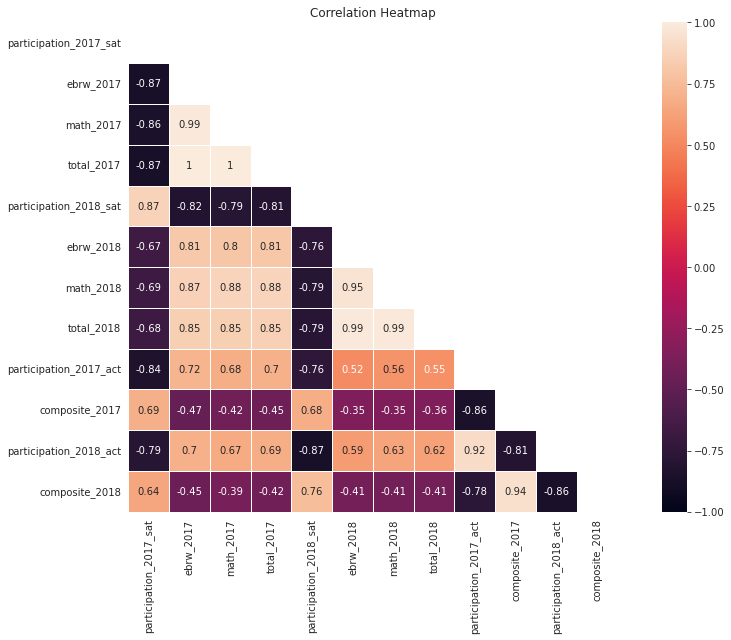

In [66]:
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = sat_act_1718.corr()

# Set up mask to be "True" in the upper right triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot the correlation heatmap, while masking the upper right triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(
        corr, mask = mask,
        square = True,
        annot = True,
        vmin = -1,
        vmax = 1,
        linewidths = .5,
    )

plt.title('Correlation Heatmap');

The correlation heat map shows that:
1) Participation in SAT is negatively correlated to participation in ACT.

2) Participation in each test is negatively correlated to the scores of their own test but positively correlated to the scores of the other test.

## Histograms

In [67]:
# creating a function to plot histograms
def create_histplot(df, column_x, color_name, labelname, bins_num):
    sns.histplot(
    df[column_x],
    color=color_name,
    label=labelname,
    bins=bins_num
    )


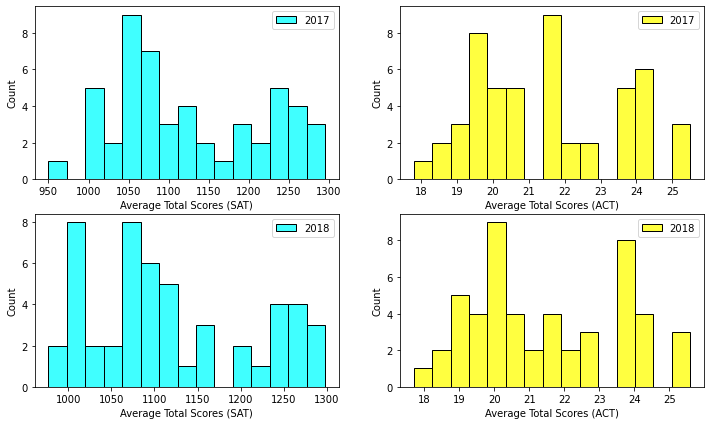

In [68]:
plt.figure(figsize = (12, 7))

# creating a histogram of average scores for SAT
plt.subplot(2, 2, 1)
create_histplot(sat_1718, 'total_2017', 'cyan', '2017', 15)
plt.legend(loc='upper right')
plt.xlabel('Average Total Scores (SAT)')


plt.subplot(2, 2, 3)
create_histplot(sat_1718, 'total_2018', 'cyan', '2018', 15)
plt.legend(loc='upper right')
plt.xlabel('Average Total Scores (SAT)')

# creating a histogram of average scores for ACT
plt.subplot(2, 2, 2)
create_histplot(act_1718, 'composite_2017', 'yellow', '2017', 15)
plt.legend(loc='upper right')
plt.xlabel('Average Total Scores (ACT)')

plt.subplot(2, 2, 4)
create_histplot(act_1718, 'composite_2018', 'yellow', '2018', 15)
plt.legend(loc='upper right')
plt.xlabel('Average Total Scores (ACT)');


The distribution for scores of SAT and ACT for both 2017 and 2018 are bimodal, the shape of the scores between the 2 years are similar.

For SAT scores, the highest peak is around 1050 to 1100 and the second peak is around 1225 - 1275.

For ACT scores, the highest peak is around 22 for 2017 and 20 for 2018. The second peak is around 20 for 2017 and 24 for 2018.

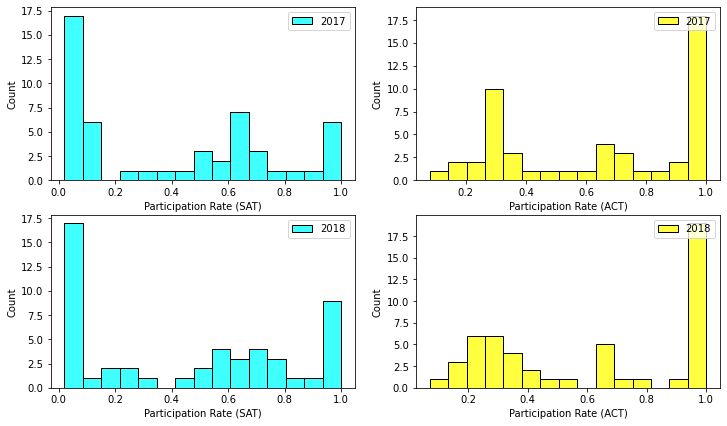

In [69]:
plt.figure(figsize = (12, 7))

# creating a histogram of participation rates for SAT
plt.subplot(2, 2, 1)
create_histplot(sat_1718, 'participation_2017', 'cyan', '2017', 15)
plt.legend(loc='upper right')
plt.xlabel('Participation Rate (SAT)')

plt.subplot(2, 2, 3)
create_histplot(sat_1718, 'participation_2018', 'cyan', '2018', 15)
plt.legend(loc='upper right')
plt.xlabel('Participation Rate (SAT)')


# creating a histogram of participation rates for ACT
plt.subplot(2, 2, 2)
create_histplot(act_1718, 'participation_2017', 'yellow', '2017', 15)
plt.legend(loc='upper right')
plt.xlabel('Participation Rate (ACT)')

plt.subplot(2, 2, 4)
create_histplot(act_1718, 'participation_2018', 'yellow', '2018', 15)
plt.legend(loc='upper right')
plt.xlabel('Participation Rate (ACT)');

The distribution for participation rate of SAT and ACT for both 2017 and 2018 are also bimodal.

There are more states with a lower participation rate for SAT compared to ACT for both 2017 and 2018.

However, at the lower participation rate for ACT, there are less states clustered around 00 - 10% and more states clustered around 20% - 40%.

It seems that ACT is the more popular choice between the two test.


## Boxplot

In [70]:
# creating a subset of SAT scores for 2017
sat_subset1 = sat_1718.loc[:, ['total_2017']]
sat_subset1['type'] = 'sat score by state 2017'
sat_subset1.columns = ['score', 'type']

# creating a subset of SAT scores for 2018
sat_subset2 = sat_1718.loc[:, ['total_2018']]
sat_subset2['type'] = 'sat score by state 2018'
sat_subset2.columns = ['score', 'type']

# creating a subset of 25th percentile SAT scores for colleges
colleges_subset = sat_act_by_college.loc[:, ['sat 25th percentile']]
colleges_subset['type'] = 'sat score by college acceptance'
colleges_subset.columns = ['score', 'type']

# creating the list of subsets dataframes
sat_list = [colleges_subset, sat_subset2, sat_subset1]

In [71]:
# creating a subset of SAT scores for 2017
act_subset1 = act_1718.loc[:, ['composite_2017']]
act_subset1['type'] = 'act score by state 2017'
act_subset1.columns = ['score', 'type']

# creating a subset of SAT scores for 2018
act_subset2 = act_1718.loc[:, ['composite_2018']]
act_subset2['type'] = 'act score by state 2018'
act_subset2.columns = ['score', 'type']

# creating a subset of 25th percentile ACT scores for colleges
colleges_subset_act = sat_act_by_college.loc[:, ['act 25th percentile']]
colleges_subset_act['type'] = 'act score by college acceptance'
colleges_subset_act.columns = ['score', 'type']

# creating the list of subsets dataframes
act_list = [colleges_subset_act, act_subset2, act_subset1]

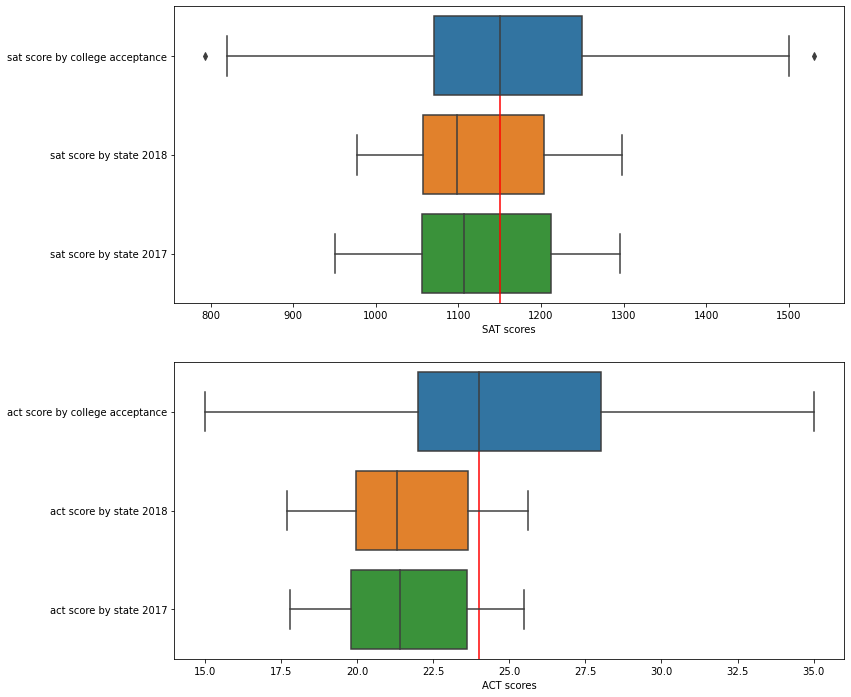

In [72]:
plt.figure(figsize = (12, 12))

# Plotting of a boxplot of the SAT subsets
plt.subplot(2, 1, 1)
sns.boxplot(
    data=pd.concat(sat_list),
    x='score',
    y='type'
).set(xlabel='SAT scores', ylabel='')
plt.vlines(x=1150, ymin = 0.4, ymax= 2.5, color='red')

plt.subplot(2, 1, 2)
sns.boxplot(
    data=pd.concat(act_list),
    x='score',
    y='type'
).set(xlabel='ACT scores', ylabel='')
plt.vlines(x=24, ymin = 0.4, ymax= 2.5, color='red');

Based on the boxplot:

1) The median 25th percentile acceptance for SAT scores lies within the Inter-Quartile Range (IQR) for average SAT scores in both 2017 and 2018.

2) The median 25th percentile acceptance for ACT scores lies outside the IQR for average ACT scores in both 2017 and 2018.

Hence, it would take above 75th percentile score to be accepted to college with ACT.


## Scatterplot

In [73]:
# creating a function for plotting scatterplots with regression line.
def create_scatter(df, column_x, column_y, labelname, title):
    sns.regplot(
    x=df[column_x],
    y=df[column_y],
    label = labelname
    )
    
    plt.legend(loc = 'upper right')
    plt.title(title)

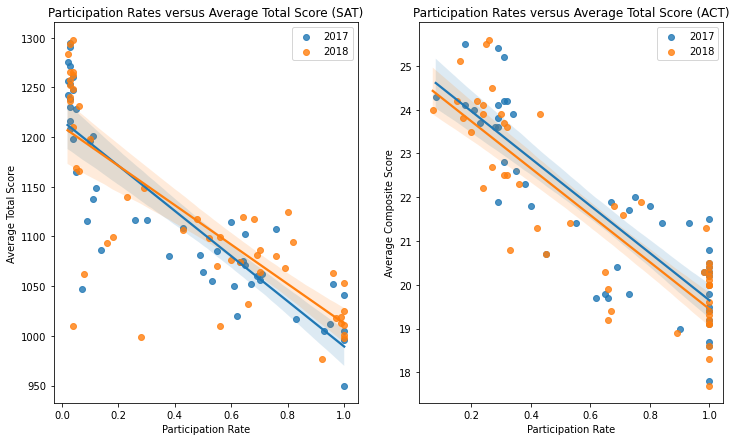

In [74]:
plt.figure(figsize = (12, 7))

# Creating scatterplot for Participation rate vs Total Score for SAT for both years
plt.subplot(1, 2, 1)
create_scatter(sat_1718, 'participation_2017','total_2017', '2017', 'Participation Rates versus Average Total Score (SAT)')

plt.subplot(1, 2, 1)
create_scatter(sat_1718, 'participation_2018','total_2018', '2018', 'Participation Rates versus Average Total Score (SAT)')
plt.xlabel('Participation Rate')
plt.ylabel('Average Total Score')


# Creating scatterplot for Participation rate vs Total Score for ACT for both years
plt.subplot(1, 2, 2)
create_scatter(act_1718, 'participation_2017','composite_2017', '2017', 'Participation Rates versus Average Total Score (ACT)')

plt.subplot(1, 2, 2)
create_scatter(act_1718, 'participation_2018','composite_2018', '2018', 'Participation Rates versus Average Total Score (ACT)')
plt.xlabel('Participation Rate')
plt.ylabel('Average Composite Score');


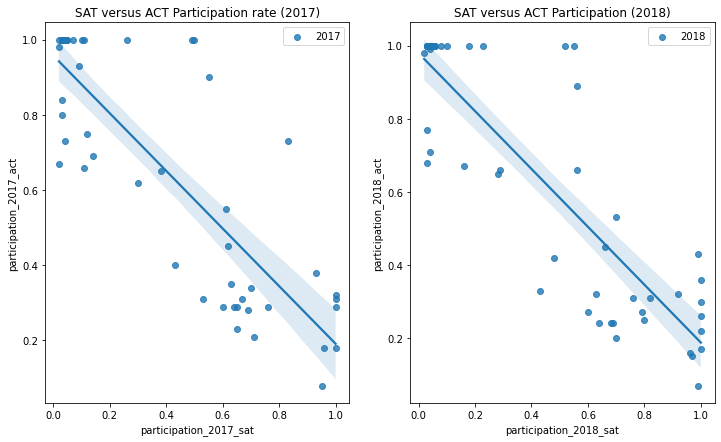

In [75]:
plt.figure(figsize = (12, 7))

# Creating scatterplot for Participation rate of SAT vs ACT for both years
plt.subplot(1, 2, 1)
create_scatter(sat_act_1718, 'participation_2017_sat','participation_2017_act', '2017', 'SAT versus ACT Participation rate (2017)')

plt.subplot(1, 2, 2)
create_scatter(sat_act_1718, 'participation_2018_sat','participation_2018_act', '2018', 'SAT versus ACT Participation (2018)')



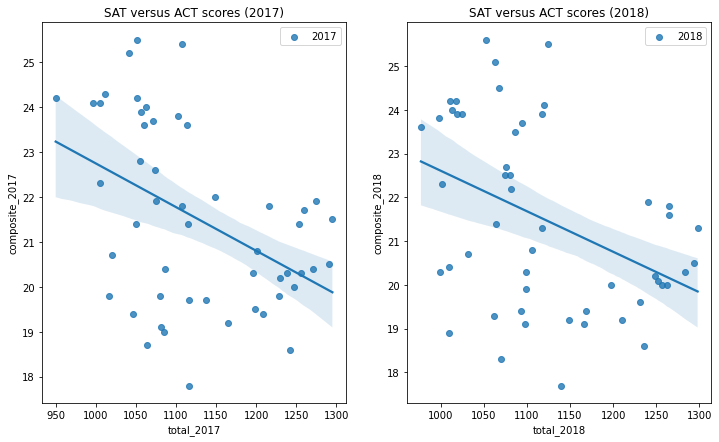

In [76]:
plt.figure(figsize = (12, 7))

# Creating scatterplot for Total Score for SAT vs ACT for both years
plt.subplot(1, 2, 1)
create_scatter(sat_act_1718, 'total_2017','composite_2017', '2017', 'SAT versus ACT scores (2017)')

plt.subplot(1, 2, 2)
create_scatter(sat_act_1718, 'total_2018','composite_2018', '2018', 'SAT versus ACT scores (2018)')



From the scatterplots, the following trends can be seen:
1) There is a negative correlation between participation rates and total score for both SAT and ACT. The results between the 2 years are also similiar.
2) There is a negative correlation between participation rates between SAT and ACT.
3) There is a weak negative correlation between SAT total scores and ACT composite scores.

## Barchart

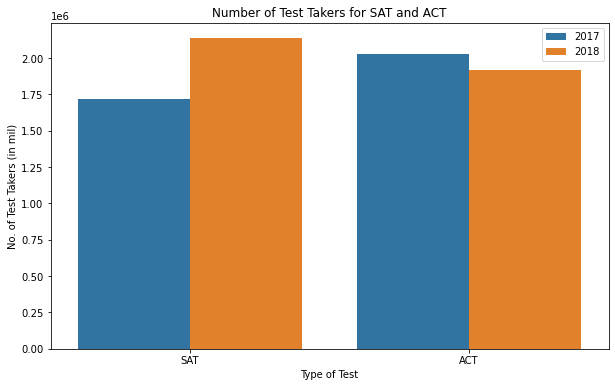

In [77]:
plt.figure(figsize = (10, 6))

# Plotting the number of test takers for SAT and ACT in 2017 and 2018
sns.barplot(
    data=total_overall_participation,
    x='type',
    y='test takers',
    hue='year'
).set(xlabel='Type of Test', ylabel='No. of Test Takers (in mil)')
plt.title('Number of Test Takers for SAT and ACT')
plt.legend(loc='upper right');

From this barchart:
1) The number of test takers for SAT had increased from below 1.75 mil to more than 2 mil while the number of test takers for ACT did not decrease by the same amount.

2) More students took both tests in 2018 compared to 2017.

3) Even though we noticed that more states had mandated to take ACTs instead, SAT still remains a popular choice for students as the number of test takers are still approximately the same for both SAT and ACT.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

From all the analysis, based on the 25th percentile of SAT and ACT scores by students who were accepted in the various college, there were more average SAT scores of the different states which will be accepted compared to the average ACT scores of the different states.

Students would have to score above the 75th percentile of ACT scores to be accepted by a majority of the colleges. Hence, I will recommend for graduating high school students to take SAT over ACT.

However, students should still focus on ACT if the state mandates taking ACT and only attempt to take the SAT if they are confident in splitting their attention

It is also recommended for colleges to review their admissions as there is an apparent disparity between the acceptance of SAT scores vs ACT scores.


*Future areas of investigations*
- The number of students accepted by Colleges with SAT scores or ACT scores or both
- Whether the college degrees would also have a disparity in acceptance for SAT and ACT scores.


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!